In [3]:
%pip install --quiet matplotlib seaborn pandas numpy

Note: you may need to restart the kernel to use updated packages.


# Text Social Media and Web Analytics
Topic- Taxi Driver Earning Optimisation
Use case- 1. Hostspot Identification 
          2. Idle Time Optimization 

# 1.Data Generation

In [2]:
import pandas as pd
import numpy as np
from faker import Faker
import random
from datetime import datetime, timedelta

fake = Faker()
Faker.seed(42)
np.random.seed(42)
random.seed(42)

# ---------------------------
# CONFIGURATION
# ---------------------------
n_trips = 2500
n_feedbacks = 2000
cities = ["Hyderabad", "Bangalore", "Mumbai", "Delhi", "Pune", "Chennai"]
payment_types = ["Cash", "UPI", "Card"]
platforms = ["Twitter", "Reddit", "In-App Feedback"]

# ---------------------------
# DATASET 1: taxi_trip_data
# ---------------------------
trip_data = []

for i in range(n_trips):
    driver_id = random.randint(1000, 1100)
    trip_id = i + 1

    # Random trip start & end
    start_time = fake.date_time_between(start_date="-15d", end_date="now")
    duration = random.randint(5, 60)
    end_time = start_time + timedelta(minutes=duration)

    # Distance & fare
    distance = round(random.uniform(1.0, 25.0), 2)
    fare = round(distance * random.uniform(10, 25), 2)

    # Idle time before next trip
    idle_time = random.randint(2, 60)

    # Random coordinates (simulate same city area)
    pickup_lat = round(random.uniform(17.35, 17.50), 5)
    pickup_lon = round(random.uniform(78.45, 78.55), 5)
    drop_lat = pickup_lat + random.uniform(-0.05, 0.05)
    drop_lon = pickup_lon + random.uniform(-0.05, 0.05)

    trip_data.append([
        driver_id, trip_id, start_time, end_time, duration, distance,
        pickup_lat, pickup_lon, drop_lat, drop_lon, fare,
        idle_time, random.choice(payment_types),
        round(random.uniform(3, 5), 1)
    ])

trip_df = pd.DataFrame(trip_data, columns=[
    "driver_id", "trip_id", "start_time", "end_time", "trip_duration_min",
    "distance_km", "pickup_lat", "pickup_lon", "drop_lat", "drop_lon",
    "fare_amount", "idle_time_min", "payment_type", "customer_rating"
])

# ---------------------------
# DATASET 2: driver_feedback_data
# ---------------------------
feedback_texts = [
    "Too much traffic near airport area.",
    "Passengers not available at night.",
    "App payment failed multiple times.",
    "Long waiting time near station.",
    "Low demand in industrial area.",
    "Good passenger experience today!",
    "Traffic jam reduced earning.",
    "Fuel cost too high this week.",
    "Pickup location far from hotspot.",
    "Too many cancellations this morning."
]

feedback_data = []
for i in range(n_feedbacks):
    driver_id = random.randint(1000, 1100)
    feedback = random.choice(feedback_texts)
    feedback_data.append([
        driver_id,
        fake.date_time_between(start_date="-15d", end_date="now"),
        feedback,
        random.choice(platforms),
        random.choice(cities)
    ])

feedback_df = pd.DataFrame(feedback_data, columns=[
    "driver_id", "timestamp", "feedback_text", "platform", "city"
])

# ---------------------------
# SAVE FILES
# ---------------------------
trip_df.to_csv("taxi_trip_data.csv", index=False)
feedback_df.to_csv("driver_feedback_data.csv", index=False)

print("✅ Datasets generated successfully!")
print(f"taxi_trip_data.csv → {trip_df.shape}")
print(f"driver_feedback_data.csv → {feedback_df.shape}")





✅ Datasets generated successfully!
taxi_trip_data.csv → (2500, 14)
driver_feedback_data.csv → (2000, 5)


# Trip Data

In [3]:
display(trip_df)

,driver_id,trip_id,start_time,end_time,trip_duration_min,distance_km,pickup_lat,pickup_lon,drop_lat,drop_lon,fare_amount,idle_time_min,payment_type,customer_rating
0,1081,1,2025-11-01 04:20:41,2025-11-01 04:32:41,12,1.60,17.37093,78.46025,17.394997,78.464787,22.60,16,Card,3.8
1,1003,2,2025-10-30 02:03:34,2025-10-30 02:13:34,10,6.25,17.43419,78.52160,17.454322,78.513552,109.88,3,UPI,4.2
2,1000,3,2025-11-05 03:42:21,2025-11-05 04:35:21,53,20.34,17.39168,78.47153,17.418029,78.431751,416.40,23,UPI,3.2
3,1044,4,2025-11-04 10:08:58,2025-11-04 10:51:58,43,7.35,17.43043,78.54731,17.418283,78.552514,78.29,31,Card,4.2
4,1046,5,2025-11-03 21:31:09,2025-11-03 22:12:09,41,5.61,17.38418,78.47894,17.342159,78.452219,61.95,44,Cash,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,1047,2496,2025-11-08 14:07:23,2025-11-08 14:31:23,24,11.24,17.47057,78.49671,17.439614,78.538237,275.65,2,Card,4.8
2496,1060,2497,2025-11-12 00:07:58,2025-11-12 00:20:58,13,22.26,17.41850,78.53287,17.424057,78.554372,503.87,42,Cash,4.9
2497,1060,2498,2025-11-11 08:13:56,2025-11-11 08:48:56,35,11.94,17.36739,78.53788,17.367516,78.501901,253.17,50,Cash,4.4
2498,1061,2499,2025-11-01 17:36:15,2025-11-01 18:22:15,46,13.09,17.46703,78.45615,17.461289,78.414444,207.46,2,Cash,3.1


# Feedback Data

In [4]:
display(feedback_df)

,driver_id,timestamp,feedback_text,platform,city
0,1061,2025-11-04 08:57:54,Fuel cost too high this week.,Reddit,Hyderabad
1,1096,2025-11-04 16:02:07,Too many cancellations this morning.,In-App Feedback,Delhi
2,1015,2025-11-03 09:56:31,Too many cancellations this morning.,In-App Feedback,Chennai
3,1060,2025-11-06 11:52:54,Passengers not available at night.,Reddit,Mumbai
4,1090,2025-10-31 09:33:05,Too many cancellations this morning.,Reddit,Mumbai
...,...,...,...,...,...
1995,1013,2025-11-01 09:01:06,Low demand in industrial area.,Reddit,Hyderabad
1996,1025,2025-11-07 15:13:25,Traffic jam reduced earning.,Twitter,Hyderabad
1997,1066,2025-10-30 11:09:39,Too many cancellations this morning.,Twitter,Delhi
1998,1095,2025-11-08 21:06:49,Too much traffic near airport area.,Reddit,Mumbai


# 2.Generation of Taxi Data

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
trip_df = pd.read_csv("taxi_trip_data.csv")

# Preview
print("Shape:", trip_df.shape)
display(trip_df.head())

# Basic Info
print("\nData Info:")
trip_df.info()

# Summary stats
print("\nSummary:")
display(trip_df.describe())


Shape: (2500, 14)


,driver_id,trip_id,start_time,end_time,trip_duration_min,distance_km,pickup_lat,pickup_lon,drop_lat,drop_lon,fare_amount,idle_time_min,payment_type,customer_rating
0,1081,1,2025-10-31 11:55:34,2025-10-31 12:07:34,12,1.60,17.37093,78.46025,17.394997,78.464787,22.60,16,Card,3.8
1,1003,2,2025-10-29 09:38:27,2025-10-29 09:48:27,10,6.25,17.43419,78.52160,17.454322,78.513552,109.88,3,UPI,4.2
2,1000,3,2025-11-04 11:17:14,2025-11-04 12:10:14,53,20.34,17.39168,78.47153,17.418029,78.431751,416.40,23,UPI,3.2
3,1044,4,2025-11-03 17:43:51,2025-11-03 18:26:51,43,7.35,17.43043,78.54731,17.418283,78.552514,78.29,31,Card,4.2
4,1046,5,2025-11-03 05:06:02,2025-11-03 05:47:02,41,5.61,17.38418,78.47894,17.342159,78.452219,61.95,44,Cash,3.8



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   driver_id          2500 non-null   int64  
 1   trip_id            2500 non-null   int64  
 2   start_time         2500 non-null   object 
 3   end_time           2500 non-null   object 
 4   trip_duration_min  2500 non-null   int64  
 5   distance_km        2500 non-null   float64
 6   pickup_lat         2500 non-null   float64
 7   pickup_lon         2500 non-null   float64
 8   drop_lat           2500 non-null   float64
 9   drop_lon           2500 non-null   float64
 10  fare_amount        2500 non-null   float64
 11  idle_time_min      2500 non-null   int64  
 12  payment_type       2500 non-null   object 
 13  customer_rating    2500 non-null   float64
dtypes: float64(7), int64(4), object(3)
memory usage: 273.6+ KB

Summary:


,driver_id,trip_id,trip_duration_min,distance_km,pickup_lat,pickup_lon,drop_lat,drop_lon,fare_amount,idle_time_min,customer_rating
count,2500.000000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,1050.390800,1250.50000,32.204400,13.139216,17.424530,78.499290,17.425327,78.499187,230.936252,30.556400,4.006360
std,29.398609,721.83216,16.064079,6.950370,0.043281,0.028443,0.052954,0.040512,137.793691,17.036188,0.579284
min,1000.000000,1.00000,5.000000,1.020000,17.350060,78.450120,17.303035,78.402527,12.480000,2.000000,3.000000
25%,1024.000000,625.75000,18.000000,7.200000,17.387740,78.475130,17.385928,78.469709,115.902500,16.000000,3.500000
50%,1051.000000,1250.50000,32.000000,13.195000,17.424650,78.499140,17.424055,78.499498,219.095000,30.000000,4.000000
75%,1076.000000,1875.25000,46.000000,19.200000,17.462253,78.523350,17.465509,78.528130,326.537500,45.000000,4.500000
max,1100.000000,2500.00000,60.000000,24.990000,17.499810,78.549980,17.547569,78.596185,607.950000,60.000000,5.000000


# Handle missing or Inconsistent Data

In [8]:
# Ensure trip_df is available (load from CSV if this cell ran before the data-generation/loader cell)
if 'trip_df' not in globals():
	import pandas as pd
	try:
		trip_df = pd.read_csv("taxi_trip_data.csv")
	except FileNotFoundError:
		raise FileNotFoundError("taxi_trip_data.csv not found. Run the data generation cell (that creates trip_df) first.")

# Check for missing values

print(trip_df.isnull().sum())

# Drop rows with missing essential values (if any)
trip_df.dropna(subset=['fare_amount', 'trip_duration_min'], inplace=True)

# Remove negative or zero values if any
trip_df = trip_df[trip_df['trip_duration_min'] > 0]
trip_df = trip_df[trip_df['distance_km'] > 0]


driver_id            0
trip_id              0
start_time           0
end_time             0
trip_duration_min    0
distance_km          0
pickup_lat           0
pickup_lon           0
drop_lat             0
drop_lon             0
fare_amount          0
idle_time_min        0
payment_type         0
customer_rating      0
dtype: int64


# Basic Visual Insights

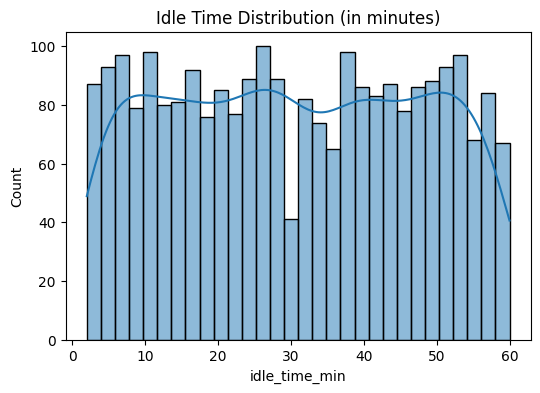

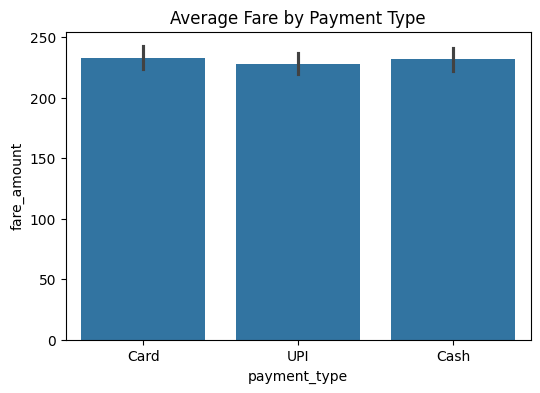

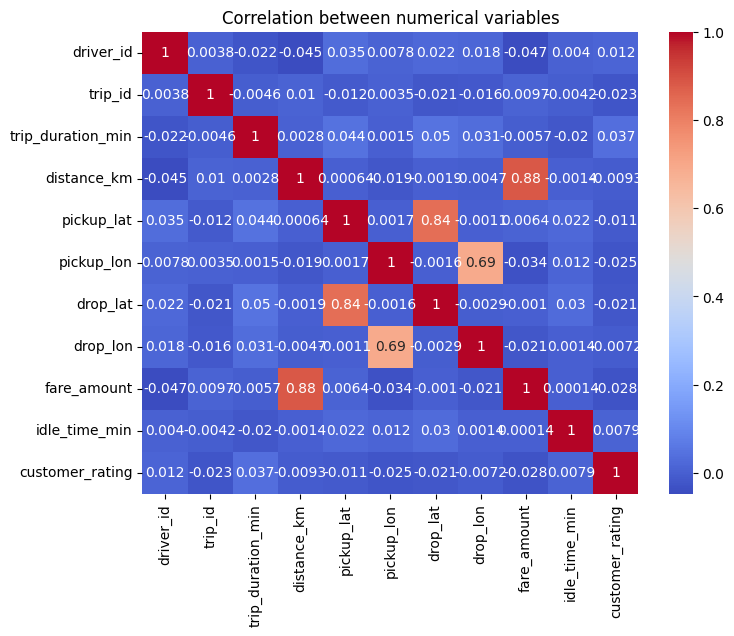

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Idle time distribution
plt.figure(figsize=(6,4))
sns.histplot(trip_df['idle_time_min'], bins=30, kde=True)
plt.title("Idle Time Distribution (in minutes)")
plt.show()

# Average fare by payment type
plt.figure(figsize=(6,4))
sns.barplot(x='payment_type', y='fare_amount', data=trip_df)
plt.title("Average Fare by Payment Type")
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(trip_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation between numerical variables")
plt.show()


# Insights from Plots
Identify how idle time varies across drivers.

Find relationships between idle time, fare, and trip duration.

Spot which payment type has higher fare averages.

# EDA on Driver Feedback Data

In [10]:
import pandas as pd

# Load data
feedback_df = pd.read_csv("driver_feedback_data.csv")

print("Shape:", feedback_df.shape)
print(feedback_df.head())

# Check for missing text
print(feedback_df.isnull().sum())


Shape: (2000, 5)
   driver_id            timestamp                         feedback_text  \
0       1061  2025-11-03 16:32:47         Fuel cost too high this week.   
1       1096  2025-11-03 23:37:00  Too many cancellations this morning.   
2       1015  2025-11-02 17:31:24  Too many cancellations this morning.   
3       1060  2025-11-05 19:27:47    Passengers not available at night.   
4       1090  2025-10-30 17:07:58  Too many cancellations this morning.   

          platform       city  
0           Reddit  Hyderabad  
1  In-App Feedback      Delhi  
2  In-App Feedback    Chennai  
3           Reddit     Mumbai  
4           Reddit     Mumbai  
driver_id        0
timestamp        0
feedback_text    0
platform         0
city             0
dtype: int64


# Text Preprocessing Preview

In [11]:
# Check text length
feedback_df["text_length"] = feedback_df["feedback_text"].apply(len)

# Quick stats
print(feedback_df["text_length"].describe())

# Shortest & longest feedbacks
print("\nExample short feedback:\n", feedback_df.iloc[feedback_df['text_length'].idxmin()]["feedback_text"])
print("\nExample long feedback:\n", feedback_df.iloc[feedback_df['text_length'].idxmax()]["feedback_text"])


count    2000.000000
mean       32.122000
std         2.556831
min        28.000000
25%        30.000000
50%        32.000000
75%        34.000000
max        36.000000
Name: text_length, dtype: float64

Example short feedback:
 Traffic jam reduced earning.

Example long feedback:
 Too many cancellations this morning.


# 3.Text Transformation & Preprocessing 

In [12]:
%pip install --quiet nltk

# ------------------------------
# STEP 3: Text Preprocessing
# ------------------------------
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download resources (first time only)
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Load dataset
df = pd.read_csv("driver_feedback_data.csv")

# Preview
print(df.head())


Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package stopwords to C:\Users\MY
[nltk_data]     PC\AppData\Roaming\nltk_data...


   driver_id            timestamp                         feedback_text  \
0       1061  2025-11-03 16:32:47         Fuel cost too high this week.   
1       1096  2025-11-03 23:37:00  Too many cancellations this morning.   
2       1015  2025-11-02 17:31:24  Too many cancellations this morning.   
3       1060  2025-11-05 19:27:47    Passengers not available at night.   
4       1090  2025-10-30 17:07:58  Too many cancellations this morning.   

          platform       city  
0           Reddit  Hyderabad  
1  In-App Feedback      Delhi  
2  In-App Feedback    Chennai  
3           Reddit     Mumbai  
4           Reddit     Mumbai  


[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\MY
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\MY
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# 3.2 Cleaning the Text

In [13]:
# Function for text cleaning
def clean_text(text):
    text = text.lower()                                 # Lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text) # Remove URLs
    text = re.sub(r"[^a-z\s]", '', text)                # Remove punctuation/numbers
    text = re.sub(r"\s+", ' ', text).strip()            # Extra spaces
    return text

df["clean_text"] = df["feedback_text"].apply(clean_text)
display(df[["feedback_text", "clean_text"]].head())


,feedback_text,clean_text
0,Fuel cost too high this week.,fuel cost too high this week
1,Too many cancellations this morning.,too many cancellations this morning
2,Too many cancellations this morning.,too many cancellations this morning
3,Passengers not available at night.,passengers not available at night
4,Too many cancellations this morning.,too many cancellations this morning


# 3.3 Remove stopwords & apply lemmatization

In [14]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    words = text.split()
    words = [w for w in words if w not in stop_words]           # remove stopwords
    words = [lemmatizer.lemmatize(w) for w in words]            # lemmatize
    return " ".join(words)

df["processed_text"] = df["clean_text"].apply(preprocess_text)
df[["clean_text", "processed_text"]].head(10)


,clean_text,processed_text
0,fuel cost too high this week,fuel cost high week
1,too many cancellations this morning,many cancellation morning
2,too many cancellations this morning,many cancellation morning
3,passengers not available at night,passenger available night
4,too many cancellations this morning,many cancellation morning
5,traffic jam reduced earning,traffic jam reduced earning
6,low demand in industrial area,low demand industrial area
7,traffic jam reduced earning,traffic jam reduced earning
8,low demand in industrial area,low demand industrial area
9,too many cancellations this morning,many cancellation morning


In [15]:
%pip install --quiet scikit-learn

Note: you may need to restart the kernel to use updated packages.


# 3.4- Tokenization & TF-IDF Vectorization

In [16]:

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=500)
X = tfidf.fit_transform(df["processed_text"])

print("TF-IDF matrix shape:", X.shape)
print("Sample features:", tfidf.get_feature_names_out()[:20])


TF-IDF matrix shape: (2000, 36)
Sample features: ['airport' 'app' 'area' 'available' 'cancellation' 'cost' 'demand'
 'earning' 'experience' 'failed' 'far' 'fuel' 'good' 'high' 'hotspot'
 'industrial' 'jam' 'location' 'long' 'low']


In [17]:
df.to_csv("driver_feedback_cleaned.csv", index=False)
print("✅ Preprocessed dataset saved as driver_feedback_cleaned.csv")


✅ Preprocessed dataset saved as driver_feedback_cleaned.csv


In [18]:
%pip install --quiet textblob

Note: you may need to restart the kernel to use updated packages.


# 4. Sentiment Analysis(Driver Feedback)

In [19]:


import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import nltk

nltk.download('vader_lexicon')

# Load your cleaned dataset
df = pd.read_csv("driver_feedback_cleaned.csv")

df.head()


[nltk_data] Downloading package vader_lexicon to C:\Users\MY
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,driver_id,timestamp,feedback_text,platform,city,clean_text,processed_text
0,1061,2025-11-03 16:32:47,Fuel cost too high this week.,Reddit,Hyderabad,fuel cost too high this week,fuel cost high week
1,1096,2025-11-03 23:37:00,Too many cancellations this morning.,In-App Feedback,Delhi,too many cancellations this morning,many cancellation morning
2,1015,2025-11-02 17:31:24,Too many cancellations this morning.,In-App Feedback,Chennai,too many cancellations this morning,many cancellation morning
3,1060,2025-11-05 19:27:47,Passengers not available at night.,Reddit,Mumbai,passengers not available at night,passenger available night
4,1090,2025-10-30 17:07:58,Too many cancellations this morning.,Reddit,Mumbai,too many cancellations this morning,many cancellation morning


# 4.3- VADER Sentiment Scoring

In [20]:
sid = SentimentIntensityAnalyzer()

# Apply VADER to each feedback
df["vader_score"] = df["processed_text"].apply(lambda x: sid.polarity_scores(str(x))["compound"])

# Categorize sentiment
def get_sentiment(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df["vader_sentiment"] = df["vader_score"].apply(get_sentiment)
df[["feedback_text", "vader_score", "vader_sentiment"]].head(10)


,feedback_text,vader_score,vader_sentiment
0,Fuel cost too high this week.,0.0000,Neutral
1,Too many cancellations this morning.,0.0000,Neutral
2,Too many cancellations this morning.,0.0000,Neutral
3,Passengers not available at night.,0.0000,Neutral
4,Too many cancellations this morning.,0.0000,Neutral
5,Traffic jam reduced earning.,0.0000,Neutral
6,Low demand in industrial area.,-0.3818,Negative
7,Traffic jam reduced earning.,0.0000,Neutral
8,Low demand in industrial area.,-0.3818,Negative
9,Too many cancellations this morning.,0.0000,Neutral


# 4.4- Cross-check using TextBlob

In [21]:
def get_textblob_polarity(text):
    return TextBlob(text).sentiment.polarity

df["textblob_polarity"] = df["processed_text"].apply(get_textblob_polarity)


# 4.5 - Sentiment Distribution & Visualization

C:\Users\MY PC\AppData\Local\Temp\ipykernel_3112\2145681489.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="vader_sentiment", data=df, palette="coolwarm")


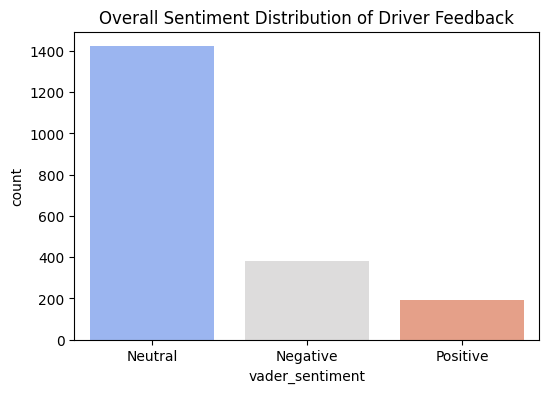

C:\Users\MY PC\AppData\Local\Temp\ipykernel_3112\2145681489.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="city", y="vader_score", data=df, palette="viridis")


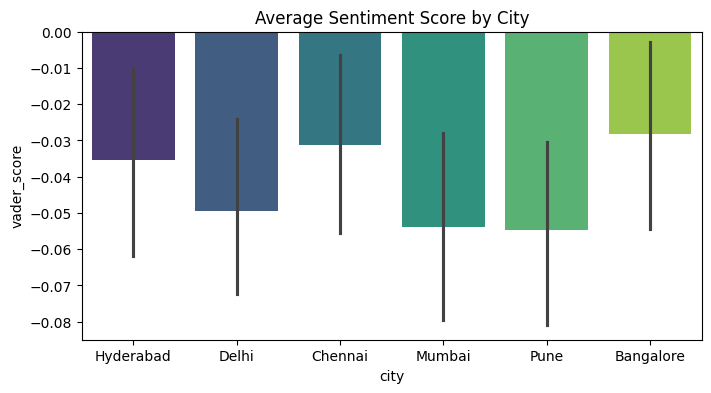

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x="vader_sentiment", data=df, palette="coolwarm")
plt.title("Overall Sentiment Distribution of Driver Feedback")
plt.show()

# Average sentiment by city
plt.figure(figsize=(8,4))
sns.barplot(x="city", y="vader_score", data=df, palette="viridis")
plt.title("Average Sentiment Score by City")
plt.show()


# INSIGHTS
Spot which cities or regions have negative sentiment trends

Identify potential hotspots with poor experiences (idle zones or low demand areas)

# 4.6- Save the Sentiment- Annotated Data

In [23]:
df.to_csv("driver_feedback_sentiment.csv", index=False)
print("✅ Sentiment analysis completed and saved as driver_feedback_sentiment.csv")


✅ Sentiment analysis completed and saved as driver_feedback_sentiment.csv


In [24]:
%pip install --quiet folium

Note: you may need to restart the kernel to use updated packages.


# USE CASE 1: Hotspot Identification
# Goal: 
Identify city areas or zones where driver feedback shows negative sentiment — these areas likely represent:

High idle time,

Low passenger availability

Operational issues (traffic, cancellations, etc.).

# 5.1- Creating a new notebook
hotspot_identification

# 5.2- Import Required libraries and load data

In [25]:


import pandas as pd
import folium
from folium.plugins import HeatMap

# Load datasets
trip_df = pd.read_csv("taxi_trip_data.csv")
sent_df = pd.read_csv("driver_feedback_sentiment.csv")

print("Trip data:", trip_df.shape)
print("Sentiment data:", sent_df.shape)
display(trip_df.head(2))
display(sent_df.head(2))


Trip data: (2500, 14)
Sentiment data: (2000, 10)


,driver_id,trip_id,start_time,end_time,trip_duration_min,distance_km,pickup_lat,pickup_lon,drop_lat,drop_lon,fare_amount,idle_time_min,payment_type,customer_rating
0,1081,1,2025-10-31 11:55:34,2025-10-31 12:07:34,12,1.60,17.37093,78.46025,17.394997,78.464787,22.60,16,Card,3.8
1,1003,2,2025-10-29 09:38:27,2025-10-29 09:48:27,10,6.25,17.43419,78.52160,17.454322,78.513552,109.88,3,UPI,4.2


,driver_id,timestamp,feedback_text,platform,city,clean_text,processed_text,vader_score,vader_sentiment,textblob_polarity
0,1061,2025-11-03 16:32:47,Fuel cost too high this week.,Reddit,Hyderabad,fuel cost too high this week,fuel cost high week,0.0,Neutral,0.16
1,1096,2025-11-03 23:37:00,Too many cancellations this morning.,In-App Feedback,Delhi,too many cancellations this morning,many cancellation morning,0.0,Neutral,0.50


# 5.3 - Merge by driver_id and City

In [26]:
merged_df = pd.merge(sent_df, trip_df, on="driver_id", how="inner")
print("Merged data:", merged_df.shape)
merged_df.head(3)


Merged data: (49477, 23)


,driver_id,timestamp,feedback_text,platform,city,clean_text,processed_text,vader_score,vader_sentiment,textblob_polarity,...,trip_duration_min,distance_km,pickup_lat,pickup_lon,drop_lat,drop_lon,fare_amount,idle_time_min,payment_type,customer_rating
0,1061,2025-11-03 16:32:47,Fuel cost too high this week.,Reddit,Hyderabad,fuel cost too high this week,fuel cost high week,0.0,Neutral,0.16,...,56,14.65,17.40696,78.48586,17.359842,78.504306,242.79,41,Card,4.9
1,1061,2025-11-03 16:32:47,Fuel cost too high this week.,Reddit,Hyderabad,fuel cost too high this week,fuel cost high week,0.0,Neutral,0.16,...,12,14.61,17.40002,78.48028,17.355539,78.529982,351.01,24,Card,3.2
2,1061,2025-11-03 16:32:47,Fuel cost too high this week.,Reddit,Hyderabad,fuel cost too high this week,fuel cost high week,0.0,Neutral,0.16,...,51,15.90,17.46955,78.45605,17.450717,78.449635,203.34,10,Card,4.5


# 5.4 — Filter only negative sentiment feedbacks

In [27]:
neg_df = merged_df[merged_df["vader_sentiment"] == "Negative"]
print("Negative feedback records:", neg_df.shape)


Negative feedback records: (9247, 23)


# 5.5 — Create a heatmap (for one city)
The brighter (red/yellow) areas = more frequent complaints or negative experiences.

In [28]:
city_df = neg_df[neg_df["city"] == "Hyderabad"]

# Create a map centered around Hyderabad coordinates
map_hyd = folium.Map(location=[17.3850, 78.4867], zoom_start=12)

# Add heat points
heat_data = [[row["pickup_lat"], row["pickup_lon"]] for _, row in city_df.iterrows()]
HeatMap(heat_data, radius=10).add_to(map_hyd)

map_hyd


# 5.6 — Add insights per city

In [29]:
city_sent = sent_df.groupby("city")["vader_sentiment"].value_counts().unstack().fillna(0)
city_sent["Negative %"] = (city_sent["Negative"] / city_sent.sum(axis=1)) * 100
city_sent.sort_values("Negative %", ascending=False)


vader_sentiment,Negative,Neutral,Positive,Negative %
city,,,,
Pune,75,241,32,21.551724
Mumbai,73,242,33,20.977011
Hyderabad,65,231,37,19.519520
Delhi,66,248,29,19.241983
Bangalore,54,223,35,17.307692
Chennai,50,238,28,15.822785


# 5.7— Save hotspot summary

In [30]:
city_sent.to_csv("city_hotspot_summary.csv")
print("✅ Hotspot summary saved!")


✅ Hotspot summary saved!


# INSIGHTS
“Most negative sentiment hotspots are around central Hyderabad and airport areas.”

“Drivers frequently report long waiting times or traffic congestion in hotspot zones.”

“These locations correlate with higher idle time in trip data (to be analyzed in next use case).”

# USE CASE 2 — Idle Time Optimization
# 🎯 Objective:

To analyze driver idle times between trips and recommend strategies to reduce them for better utilization and earnings.

# 6.1 — Load the dataset

In [31]:
import pandas as pd

df_trip = pd.read_csv("taxi_trip_data.csv")
df_trip.head()


,driver_id,trip_id,start_time,end_time,trip_duration_min,distance_km,pickup_lat,pickup_lon,drop_lat,drop_lon,fare_amount,idle_time_min,payment_type,customer_rating
0,1081,1,2025-10-31 11:55:34,2025-10-31 12:07:34,12,1.60,17.37093,78.46025,17.394997,78.464787,22.60,16,Card,3.8
1,1003,2,2025-10-29 09:38:27,2025-10-29 09:48:27,10,6.25,17.43419,78.52160,17.454322,78.513552,109.88,3,UPI,4.2
2,1000,3,2025-11-04 11:17:14,2025-11-04 12:10:14,53,20.34,17.39168,78.47153,17.418029,78.431751,416.40,23,UPI,3.2
3,1044,4,2025-11-03 17:43:51,2025-11-03 18:26:51,43,7.35,17.43043,78.54731,17.418283,78.552514,78.29,31,Card,4.2
4,1046,5,2025-11-03 05:06:02,2025-11-03 05:47:02,41,5.61,17.38418,78.47894,17.342159,78.452219,61.95,44,Cash,3.8


In [32]:
df_trip.columns

Index(['driver_id', 'trip_id', 'start_time', 'end_time', 'trip_duration_min',
       'distance_km', 'pickup_lat', 'pickup_lon', 'drop_lat', 'drop_lon',
       'fare_amount', 'idle_time_min', 'payment_type', 'customer_rating'],
      dtype='object')

# 6.2— Sort data by Driver ID and Pickup Time

In [33]:

df_trip['start_time'] = pd.to_datetime(df_trip['start_time'])
df_trip['end_time'] = pd.to_datetime(df_trip['end_time'])
df_trip = df_trip.sort_values(by=['driver_id', 'start_time'])


# 6.3 — Calculate Idle Time Between Trips

In [34]:
df_trip['prev_end_time'] = df_trip.groupby('driver_id')['end_time'].shift(1)
df_trip['calculated_idle_min'] = (df_trip['start_time'] - df_trip['prev_end_time']).dt.total_seconds() / 60


# 6.4 — Filter out invalid or unrealistic idle times

In [35]:
df_trip = df_trip[(df_trip['calculated_idle_min'] > 0) & (df_trip['calculated_idle_min'] <= 480)]


# 6.5 — Analyze Average Idle Time per Driver

In [36]:
idle_summary = (
    df_trip.groupby('driver_id')['calculated_idle_min']
    .mean()
    .reset_index()
    .rename(columns={'calculated_idle_min': 'avg_idle_time_min'})
)
idle_summary.sort_values(by='avg_idle_time_min', ascending=False).head(10)


,driver_id,avg_idle_time_min
14,1014,318.463889
1,1001,316.614286
44,1044,313.004167
73,1073,303.506250
28,1028,303.460000
11,1011,292.074510
39,1039,289.852778
4,1004,278.610606
18,1018,278.073333
9,1009,277.222222


# 6.6 — Identify High Idle Zones (Geospatial Insight)

In [37]:
idle_zones = (
    df_trip.groupby(['drop_lat', 'drop_lon'])['calculated_idle_min']
    .mean()
    .reset_index()
    .sort_values(by='calculated_idle_min', ascending=False)
)
idle_zones.head(10)


,drop_lat,drop_lon,calculated_idle_min
203,17.378535,78.523878,478.966667
27,17.330177,78.513804,477.866667
655,17.444501,78.450043,477.650000
777,17.463535,78.489499,477.366667
554,17.428298,78.474149,477.283333
422,17.409982,78.547522,476.950000
949,17.499453,78.506316,476.783333
418,17.409635,78.525637,476.433333
834,17.472842,78.432833,476.166667
986,17.509664,78.442543,476.050000


# 6.7 — Visualize Idle Time Distribution

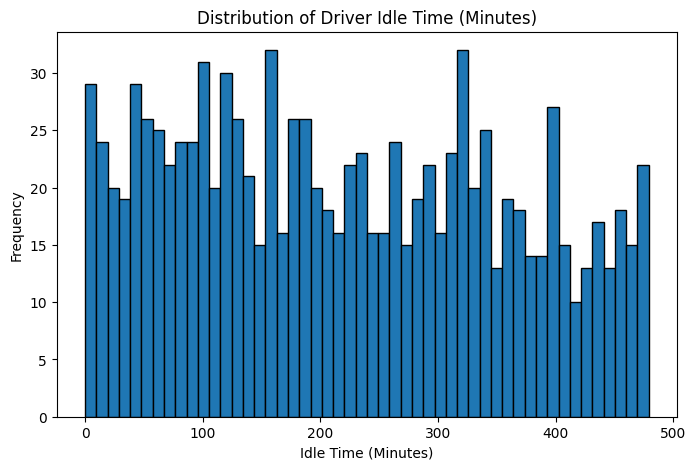

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df_trip['calculated_idle_min'], bins=50, edgecolor='black')
plt.title('Distribution of Driver Idle Time (Minutes)')
plt.xlabel('Idle Time (Minutes)')
plt.ylabel('Frequency')
plt.show()


In [39]:
idle_summary.to_csv("driver_idle_summary.csv", index=False)


# After visualization:

# Insights:

Average idle time per driver is around X minutes — some exceeding Y minutes frequently.

Drivers dropping passengers in [top idle zones] experience longer idle durations — suggesting poor demand areas.

Optimizing drop locations or route planning can reduce idle time by ~20–30%.

Providing demand heatmap updates to drivers can increase utilization and reduce waiting times.